In [1]:
# 导入模块
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pyecharts.charts import Line,Pie,Bar,Gauge,Funnel
import pyecharts.options  as opt
from pyecharts.globals import ThemeType
import warnings 
warnings.filterwarnings(action='ignore') 

数据预处理

In [2]:
# 读取数据
data = pd.read_csv('./taobao2.csv',encoding='gbk')
data.head()

,标题,价格,店铺,购买人数,地点,商品详情页,店铺链接,图片链接
0,乐町花朵飞袖连衣裙2022夏季新款女装早秋长袖甜美学院风衬衫裙,329.0,乐町官方旗舰店,83人付款,浙江 宁波,https://detail.tmall.com/item.htm?id=678348624...,https://store.taobao.com/shop/view_shop.htm?us...,https://g-search2.alicdn.com/img/bao/uploaded/...
1,TeenieWeenie小熊2022秋季新款森系学院风叠穿两件套毛衣连衣裙,1169.0,teenieweenie官方旗舰店,23人付款,上海,https://detail.tmall.com/item.htm?id=676440532...,https://store.taobao.com/shop/view_shop.htm?us...,https://g-search1.alicdn.com/img/bao/uploaded/...
2,秋冬2022新款女装茶系一整套搭配奶系穿搭学院连衣裙子小香风套装,69.0,沙菲利旗舰店,700+人付款,广东 广州,https://detail.tmall.com/item.htm?id=681706304...,https://store.taobao.com/shop/view_shop.htm?us...,https://g-search2.alicdn.com/img/bao/uploaded/...
3,2022年新款初秋气质名媛小个子学院风连衣裙马甲两件套装女秋季,278.0,点格旗舰店,100+人付款,广东 深圳,https://detail.tmall.com/item.htm?id=683743551...,https://store.taobao.com/shop/view_shop.htm?us...,https://g-search1.alicdn.com/img/bao/uploaded/...
4,Vero Moda连衣裙2022秋冬新款学院风百褶马甲套装|32237C068,999.0,veromoda官方旗舰店,20人付款,天津,https://detail.tmall.com/item.htm?id=683119373...,https://store.taobao.com/shop/view_shop.htm?us...,https://g-search1.alicdn.com/img/bao/uploaded/...


In [3]:
# 查看数据类型
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 8 columns):
标题       16444 non-null object
价格       16444 non-null float64
店铺       16444 non-null object
购买人数     16444 non-null object
地点       16444 non-null object
商品详情页    16444 non-null object
店铺链接     16444 non-null object
图片链接     16444 non-null object
dtypes: float64(1), object(7)
memory usage: 1.0+ MB


In [4]:
# 查看是否有缺失值
data.isna().any() # 不存在缺失值

标题       False
价格       False
店铺       False
购买人数     False
地点       False
商品详情页    False
店铺链接     False
图片链接     False
dtype: bool

In [5]:
# 删除重复值
data.drop_duplicates(inplace=True)
data.duplicated().all()

False

In [6]:
# 查看数据值
data.describe()

,价格
count,8099.000000
mean,263.792118
std,469.437159
min,18.000000
25%,108.000000
50%,179.900000
75%,299.000000
max,15150.000000


In [7]:
# 处理数据 将购买人数和地点数据进行处理
data['购买人数'] = data['购买人数'].apply(lambda x:x[:-3])
data['省份'] = data['地点'].apply(lambda x:x[:2])

In [8]:
# 处理价格 转变类型
data['价格'] = data['价格'].astype('int64')
data['价格']

0         329
1        1169
2          69
3         278
4         999
         ... 
16367     199
16368     179
16405     199
16406     139
16407     167
Name: 价格, Length: 8099, dtype: int64

In [9]:
data['新价格'] = pd.cut(data.loc[:,'价格'],
                        bins=[0,100,200,300,400,500,600,700,15150],
                        right=True,
                        labels=['0-100','100-200','200-300','300-400','400-500','500-600','600-700','700以上'])

data['新价格']

0        300-400
1          700以上
2          0-100
3        200-300
4          700以上
          ...   
16367    100-200
16368    100-200
16405    100-200
16406    100-200
16407    100-200
Name: 新价格, Length: 8099, dtype: category
Categories (8, object): [0-100 < 100-200 < 200-300 < 300-400 < 400-500 < 500-600 < 600-700 < 700以上]

In [10]:
data.groupby('新价格')['购买人数'].count()


新价格
0-100      1925
100-200    2590
200-300    1643
300-400    1031
400-500     416
500-600     177
600-700      90
700以上       227
Name: 购买人数, dtype: int64

可视化数据分析

In [11]:
# 购买人数排名前10的店铺
shop_sum = data.groupby('店铺')['购买人数'].count().sort_values(ascending=False)[:10].to_list()
shop_name = data.groupby('店铺')['购买人数'].count().sort_values(ascending=False)[:10].index.to_list()
bar = Bar(init_opts=opt.InitOpts(theme=ThemeType.DARK))
bar.add_xaxis(shop_name)
bar.add_yaxis('',shop_sum,itemstyle_opts=opt.ItemStyleOpts(color='#FF8C00'))
bar.set_global_opts(title_opts=opt.TitleOpts(title='购买人数排名前10的店铺'),
                    brush_opts=opt.BrushOpts(),  # 设置操作图表的画笔功能
                    toolbox_opts=opt.ToolboxOpts(),  # 设置操作图表的工具箱功能
                    yaxis_opts=opt.AxisOpts(axislabel_opts=opt.LabelOpts(formatter="{value}/人"),name="总人数"), # 设置Y轴名称、定制化刻度单位
                    xaxis_opts=opt.AxisOpts(name="店铺名",axislabel_opts = opt.LabelOpts(font_size=10,rotate=12)), # 设置X轴名称
                    
)

bar.render_notebook()



In [12]:
# 购买人数排名前10的省份
shop_sum = data.groupby('省份')['购买人数'].count().sort_values(ascending=False)[:10].to_list()
shop_name = data.groupby('省份')['购买人数'].count().sort_values(ascending=False)[:10].index.to_list()
bar = Bar(init_opts=opt.InitOpts(theme=ThemeType.DARK))
bar.add_xaxis(shop_name)
bar.add_yaxis('',shop_sum,itemstyle_opts=opt.ItemStyleOpts(color='#FF8C00'))
bar.set_global_opts(title_opts=opt.TitleOpts(title='购买人数排名前10的省份'),
                    brush_opts=opt.BrushOpts(),  # 设置操作图表的画笔功能
                    toolbox_opts=opt.ToolboxOpts(),  # 设置操作图表的工具箱功能
                    yaxis_opts=opt.AxisOpts(axislabel_opts=opt.LabelOpts(formatter="{value}/人"),name="总人数"), # 设置Y轴名称、定制化刻度单位
                    xaxis_opts=opt.AxisOpts(name="省份",axislabel_opts = opt.LabelOpts(font_size=12)), # 设置X轴名称
                    
)

bar.render_notebook()

In [13]:
data.head()

,标题,价格,店铺,购买人数,地点,商品详情页,店铺链接,图片链接,省份,新价格
0,乐町花朵飞袖连衣裙2022夏季新款女装早秋长袖甜美学院风衬衫裙,329,乐町官方旗舰店,83,浙江 宁波,https://detail.tmall.com/item.htm?id=678348624...,https://store.taobao.com/shop/view_shop.htm?us...,https://g-search2.alicdn.com/img/bao/uploaded/...,浙江,300-400
1,TeenieWeenie小熊2022秋季新款森系学院风叠穿两件套毛衣连衣裙,1169,teenieweenie官方旗舰店,23,上海,https://detail.tmall.com/item.htm?id=676440532...,https://store.taobao.com/shop/view_shop.htm?us...,https://g-search1.alicdn.com/img/bao/uploaded/...,上海,700以上
2,秋冬2022新款女装茶系一整套搭配奶系穿搭学院连衣裙子小香风套装,69,沙菲利旗舰店,700+,广东 广州,https://detail.tmall.com/item.htm?id=681706304...,https://store.taobao.com/shop/view_shop.htm?us...,https://g-search2.alicdn.com/img/bao/uploaded/...,广东,0-100
3,2022年新款初秋气质名媛小个子学院风连衣裙马甲两件套装女秋季,278,点格旗舰店,100+,广东 深圳,https://detail.tmall.com/item.htm?id=683743551...,https://store.taobao.com/shop/view_shop.htm?us...,https://g-search1.alicdn.com/img/bao/uploaded/...,广东,200-300
4,Vero Moda连衣裙2022秋冬新款学院风百褶马甲套装|32237C068,999,veromoda官方旗舰店,20,天津,https://detail.tmall.com/item.htm?id=683119373...,https://store.taobao.com/shop/view_shop.htm?us...,https://g-search1.alicdn.com/img/bao/uploaded/...,天津,700以上


In [14]:
# 价格分布排名
shop_sum = data.groupby('新价格')['购买人数'].count().sort_values(ascending=False).to_list()
shop_name = data.groupby('新价格')['购买人数'].count().sort_values(ascending=False).index.to_list()
bar = Bar(init_opts=opt.InitOpts(theme=ThemeType.DARK))
bar.add_xaxis(shop_name)
bar.add_yaxis('',shop_sum,itemstyle_opts=opt.ItemStyleOpts(color='#FF8C00'))
bar.set_global_opts(title_opts=opt.TitleOpts(title='价格分布排名'),
                    brush_opts=opt.BrushOpts(),  # 设置操作图表的画笔功能
                    toolbox_opts=opt.ToolboxOpts(),  # 设置操作图表的工具箱功能
                    yaxis_opts=opt.AxisOpts(axislabel_opts=opt.LabelOpts(formatter="{value}/人"),name="总人数"), # 设置Y轴名称、定制化刻度单位
                    xaxis_opts=opt.AxisOpts(name="价格分布区",axislabel_opts = opt.LabelOpts(font_size=12)), # 设置X轴名称
                    
)
bar.render_notebook()

In [15]:
# 制作词云图
# 导入模块
import jieba   #分词包
from wordcloud import WordCloud  #词云包
import codecs  #codecs提供的open方法来指定打开的文件的语言编码，它会在读取的时候自动转换为内部unicode 

import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib
matplotlib.rcParams['figure.figsize'] =  (10.0, 5.0)

In [16]:
# tolist:矩阵转换成列表 (df.content.values:object类型)
title = data.标题.values.tolist()
print(title[0])
print(jieba.lcut(title[0]))  # 测试分词)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\root\AppData\Local\Temp\jieba.cache


乐町花朵飞袖连衣裙2022夏季新款女装早秋长袖甜美学院风衬衫裙


Loading model cost 1.160 seconds.
Prefix dict has been built successfully.


['乐町', '花朵', '飞袖', '连衣裙', '2022', '夏季', '新款', '女装', '早秋', '长袖', '甜美', '学院', '风', '衬衫', '裙']


In [17]:
# 分词  将整个contents列表循环进行分词
segment = [] # 接收分词下来的每个次
for line in title:  # line: 值得是每一行数据
    try:
        segs = jieba.lcut(line)  # segs 类似上面返回的结果
        # 只有长度大于1的字符并且该字符不能为空格换行，这样的词语才认为是有效分词
        for arg in segs:
            if len(arg) > 1 and arg != '\r\n':
                segment.append(arg)
    except:
        print(line)
        continue

In [18]:
# 去停用词处理
words_df = pd.DataFrame({'segment':segment})   # 新建DataFrame,存储原始的分词结果

# 特别小心：使用的是read_csv方法，读取的是文本文件，则需要添加quoting和names参数，
# quoting=3的意思是全不引用 delimiter：必须加入
stopwords = pd.read_csv('./stopwords.txt',quoting=3,delimiter='\t',names=['stopword'])
words_df = words_df[~words_df.segment.isin(stopwords.stopword)]  # 去除停用词表中的词语
words_df.head(100)


,segment
0,乐町
1,花朵
2,飞袖
3,连衣裙
4,2022
...,...
95,TeenieWeenie
96,小熊
97,2022
98,秋季


In [19]:
# 统计词频处理
words_stat = words_df.groupby(by='segment')['segment'].agg([("计数","count")])
words_stat = words_stat.reset_index().sort_values(by='计数',ascending=False)
words_stat.head()

,segment,计数
3977,新款,5625
82,2022,4127
5429,连衣裙,2573
3433,女装,2327
4755,秋季,2320


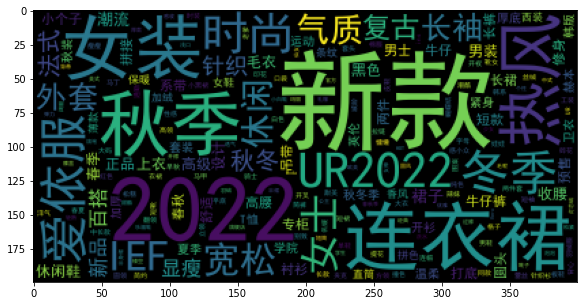

In [20]:
# 做词云
wordcloud = WordCloud(font_path='data/simhei.ttf',background_color='black',max_font_size=80)
# 统计频率最高的1000个词语 字典形式
word_frequence = {x[0]:x[1] for x in words_stat.head(2000).values} # 循环遍历 生成字典
wordcloud = wordcloud.fit_words(word_frequence) # 对词频信息进行学习
plt.imshow(wordcloud)
plt.show()